# Ranking the quarterbacks by their Win Probability Added

## 1 : Import of the librairies and data

In [1]:
#Libraries import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Data import
YEAR = 2020
data = pd.read_csv(
    'https://github.com/guga31bb/nflfastR-data/blob/master/data/play_by_play_' \
    + str(YEAR) + '.csv.gz?raw=True',compression='gzip', low_memory=False
   )

## 2. Cleaning and modification of the data

The table contains 2 columns defining the type of the pass:
- pass_length : short or deep
- pass_location : left, middle, or right

We'll create a new column called "pass_type" by concatenating these two.

Next, we'll calculate a new column called "wpa_pct" by multiplying the current wpa by 100. WPA is a probability ranging from 0 to 1 included. In order to make it easier to read, we'll transform it in a percentage.

In [3]:
data['pass_type'] = data['pass_length'] + '-' + data['pass_location']
data['wpa_pct'] = (100*data['wpa'])

Let's remove the data we do not want for our analysis, like kneel downs, field goals, penalties, etc, and assign this new dataframe to "df".

Plus, we filter on the current week of the season.

In [4]:
#Indicate the most recent week, or the one you want to analyze in particular
week = 2

#Clean the data and only keep the pass plays. Note: test if the other conditions could be removed
df = data[
    (data.week<=week) &
    (data.play_type.isin(['pass'])) &
    (data.sack==0) &      
    (data.two_point_attempt==0) &
    (data['epa'].isna()==False) &
    (data['passer_player_name'].isna()==False)
    ]

In [5]:
#Correcting G.Minshew II that is present twice
df['passer_player_name'] = df['passer_player_name'].replace(['G.Minshew II'],'G.Minshew')

C:\Users\nicol\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
#Get the QBs + their teams with their general average WPA and the number of pass attempts
passer_wpa = df[['passer_player_name','posteam','pass_type','wpa_pct','play_id']].groupby(['passer_player_name','posteam']).agg(
    WPA=('wpa_pct', 'mean'),
    pass_attempts=('play_id','count')
)

#Filter on passer with at least 25 pass attempts
general_qb_wpa = passer_wpa[passer_wpa.pass_attempts>=25]

#Reset the index, otherwise passer_player_name is used as the index and that messes with the merge later on
general_qb_wpa.reset_index(inplace=True)

#Call it to make sure
general_qb_wpa

,passer_player_name,posteam,WPA,pass_attempts
0,A.Rodgers,GB,0.702468,74
1,B.Mayfield,CLE,0.599799,62
2,B.Roethlisberger,PIT,0.966881,73
3,C.Newton,NE,0.813200,63
4,C.Wentz,PHI,-0.479772,85
5,D.Brees,NO,0.136800,68
6,D.Carr,LV,1.464183,68
7,D.Haskins,WAS,0.055404,64
8,D.Jones,NYG,-0.241962,79
9,D.Lock,DEN,-0.776676,38


In [7]:
#Make an Excel-like pivot table and calculate the average WPA per pass type
pass_type_wpa = pd.pivot_table(df, values='wpa_pct', index=['passer_player_name'],columns=['pass_type'], aggfunc=np.mean)

#Transform the table in a DataFrame
pass_type_wpa1 = pd.DataFrame(pass_type_wpa)

#Call it to make sure
pass_type_wpa1

pass_type,deep-left,deep-middle,deep-right,short-left,short-middle,short-right
passer_player_name,,,,,,
A.Dalton,NaN,NaN,NaN,NaN,NaN,-0.522488
A.Rodgers,-2.441074,2.739894,1.815484,-0.469071,4.083901,0.444752
B.Mayfield,2.814970,-0.260504,0.818284,1.488512,0.302217,0.162393
B.Roethlisberger,1.378790,2.977087,1.578255,1.583525,0.716436,-0.287853
C.Jones,NaN,NaN,NaN,-2.986316,NaN,NaN
C.Newton,7.491416,1.907856,1.653803,0.127099,1.898100,-0.542439
C.Wentz,-1.040620,-1.506416,1.211711,-0.143003,-0.252732,-0.673732
D.Brees,-1.008791,0.223183,1.692445,0.556758,-0.548783,0.365132
D.Carr,-0.992066,1.518148,5.612827,0.961904,1.143411,1.788023


In [8]:
#Merge both df using passer_player_name as the unique key
total = pd.merge(general_qb_wpa,pass_type_wpa1, on='passer_player_name',how='left')
 
#Transform and work on the layout:
#sort by WPA (from best to worst), round to 2 decimals, remove the columns 'pass_attempts'
final = (
    total
    .sort_values(by=["WPA"],ascending=False)
    .round(2)
    .drop(columns='pass_attempts')
)
 
#Make the index start from 1 instead of 0 to have a ranking
final.index = np.arange(1,len(final)+1)
 
#Rename the columns to make it easier to read
final.rename(columns={"passer_player_name":"Quarterback", "posteam":"Team","WPA":"General"})

,Quarterback,Team,General,deep-left,deep-middle,deep-right,short-left,short-middle,short-right
1,J.Allen,BUF,1.57,5.86,11.07,6.20,0.05,0.03,1.04
2,D.Carr,LV,1.46,-0.99,1.52,5.61,0.96,1.14,1.79
3,R.Tannehill,TEN,1.39,3.95,4.65,-3.27,0.88,1.26,1.63
4,G.Minshew,JAX,1.25,1.99,2.63,2.52,-0.38,1.69,1.95
5,L.Jackson,BAL,1.19,3.29,2.40,-0.49,1.31,1.35,0.56
6,R.Wilson,SEA,1.12,3.49,NaN,4.02,-0.37,2.57,1.42
7,J.Goff,LA,1.08,3.11,NaN,-0.82,1.73,1.82,0.11
8,P.Mahomes,KC,1.04,-3.47,NaN,4.64,0.57,1.12,1.53
9,B.Roethlisberger,PIT,0.97,1.38,2.98,1.58,1.58,0.72,-0.29
10,J.Garoppolo,SF,0.83,-2.30,5.61,-2.12,2.65,3.74,-3.04


#Visualization

In [9]:
#Prepare a df with the needed data: QBs, team and general WPA
viz = final[['passer_player_name','posteam','WPA']]

#Call it to male sure
viz

,passer_player_name,posteam,WPA
1,J.Allen,BUF,1.57
2,D.Carr,LV,1.46
3,R.Tannehill,TEN,1.39
4,G.Minshew,JAX,1.25
5,L.Jackson,BAL,1.19
6,R.Wilson,SEA,1.12
7,J.Goff,LA,1.08
8,P.Mahomes,KC,1.04
9,B.Roethlisberger,PIT,0.97
10,J.Garoppolo,SF,0.83


In [10]:
#List of all colours and the related team id
COLORS = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

In [11]:
#Make an Excel-like vlookup to create a new column with the correct color for each team
viz['color'] = viz['posteam'].map(COLORS)

#Call it to make sure
viz

C:\Users\nicol\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,passer_player_name,posteam,WPA,color
1,J.Allen,BUF,1.57,#00338D
2,D.Carr,LV,1.46,#C4C9CC
3,R.Tannehill,TEN,1.39,#4095D1
4,G.Minshew,JAX,1.25,#136677
5,L.Jackson,BAL,1.19,#241773
6,R.Wilson,SEA,1.12,#7AC142
7,J.Goff,LA,1.08,#002147
8,P.Mahomes,KC,1.04,#CA2430
9,B.Roethlisberger,PIT,0.97,#FFC20E
10,J.Garoppolo,SF,0.83,#C9243F


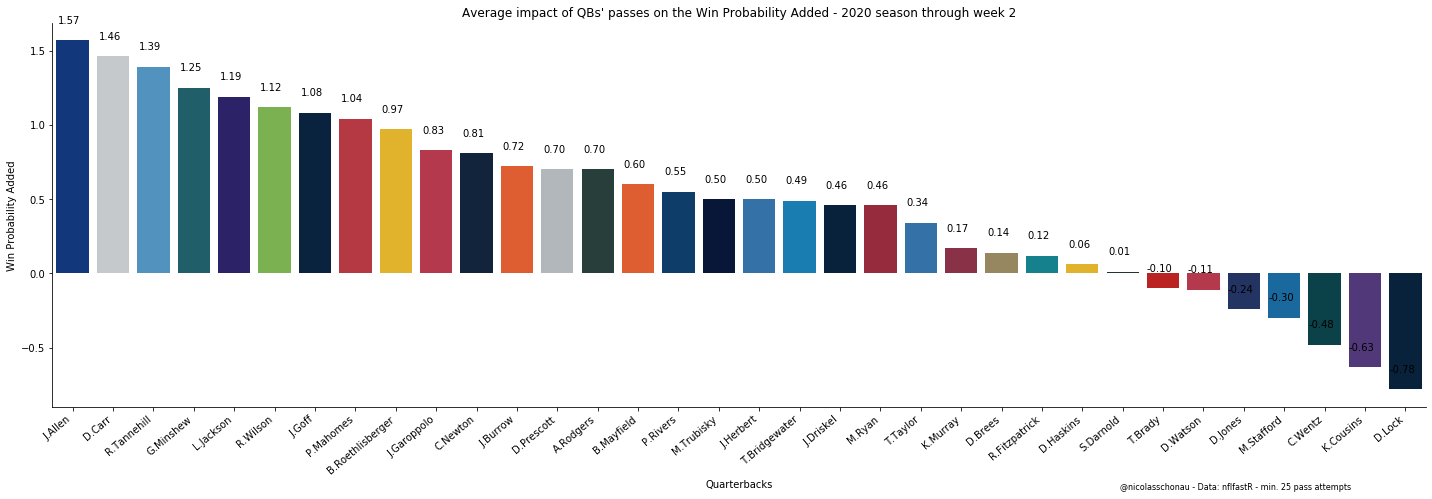

In [12]:
#Create a figure that we'll be able to use several times if needed
fig,ax = plt.subplots(figsize=(20,7))

#Pass the colors into a list, so that we have them in the correct order
#Plus, if a team is missing, that won't create any problem later 
kleuren = viz['color'].tolist()

#Set your custom list of colors as the plot's color palette
#This only accepts a list, this is why we passed the colors into a list earlier
sns.set_palette(sns.color_palette(kleuren))

#Set the barplot and pass the data
ax = sns.barplot(data=viz, x='passer_player_name',y='WPA')

#Customize the layout : add a title, axis legends and general legend impact moyen de leurs passes sur la probabilité de gagner
ax.set_title(f"Average impact of QBs' passes on the Win Probability Added - 2020 season through week {week}")
ax.set_xlabel("Quarterbacks")
ax.set_ylabel("Win Probability Added")
plt.figtext(.78,.02,'@nicolasschonau - Data: nflfastR - min. 25 pass attempts',fontsize=8)

#Remove the top and right line
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Rotate the lables, otherwise they overlap and you can't read them
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

#Use this code to annotate the bars
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2.5, p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 20),
                 textcoords='offset points')

#plt.tight_layout() automatically adjusts subplot parameters to give specified padding, so it's more beautiful
plt.tight_layout()